# Sieci neuronowe z wykorzystaniem Kerasa (1)
## Głębokie uczenie

# 1. Podstawy


**Zanim przejdziemy do bardziej zaawansowanego przykładu, zapoznamy się z Tensorflow i Keras. Przyjrzymy się pierwszemu konkretnemu przykładowi sieci neuronowej, która wykorzystuje bibliotekę Python Keras do nauki klasyfikacji odręcznie pisanych cyfr.**

Problemem, który staramy się rozwiązać, jest klasyfikacja obrazów pogrubiony tekstodręcznych cyfr w skali szarości (28 pikseli na 28 pikseli) do 10 kategorii (od 0 do 9). Zbiór danych, którego użyjemy to MNIST. Jest to zestaw 60 000 obrazów treningowych plus 10 000 obrazów testowych, zebranych przez National Institute of Standards and Technology (NIST w MNIST) w latach 80-tych.

Możesz myśleć o "rozwiązywaniu" MNIST jako o "Hello World" głębokiego uczenia się - to jest to, co robisz, aby sprawdzić, czy twoje algorytmy działają zgodnie z oczekiwaniami.

Po pierwsze, zaimportujemy Keras (w oparciu o wersję Python/Tensorflow):

In [ ]:
from tensorflow import keras
...
import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Jeśli korzystasz z najnowszej wersji Tensorflow (keras jest już dołączony), dodaj dodatkową funkcjonalność za pomocą:

```
from tensorflow import keras
from tensorflow.keras import XXX
```

Zbiór danych MNIST jest wstępnie załadowany do Keras w postaci zestawu czterech tablic Numpy:

In [ ]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

**Zadanie 1**

*   Sprawdź liczbę przykładów treningowych i testowych.
*   Ile mamy etykiet?
*   Sprawdź rozmiar obrazu i wykreśl kilka przykładów


In [ ]:
print("Kształt danych treningowych:", train_images.shape)
print("Kształt danych testowych:", test_images.shape)

Kształt danych treningowych: (60000, 28, 28)
Kształt danych testowych: (10000, 28, 28)


In [ ]:
print("Kształt etykiet treningowych:", train_labels.shape)
print("Pierwsze 10 etykiet", train_labels[:10])
print("Liczba unikalnych etykiet", len(np.unique(train_labels)))

Kształt etykiet treningowych: (60000,)
Pierwsze 10 etykiet [5 0 4 1 9 2 1 3 1 4]
Liczba unikalnych etykiey 10


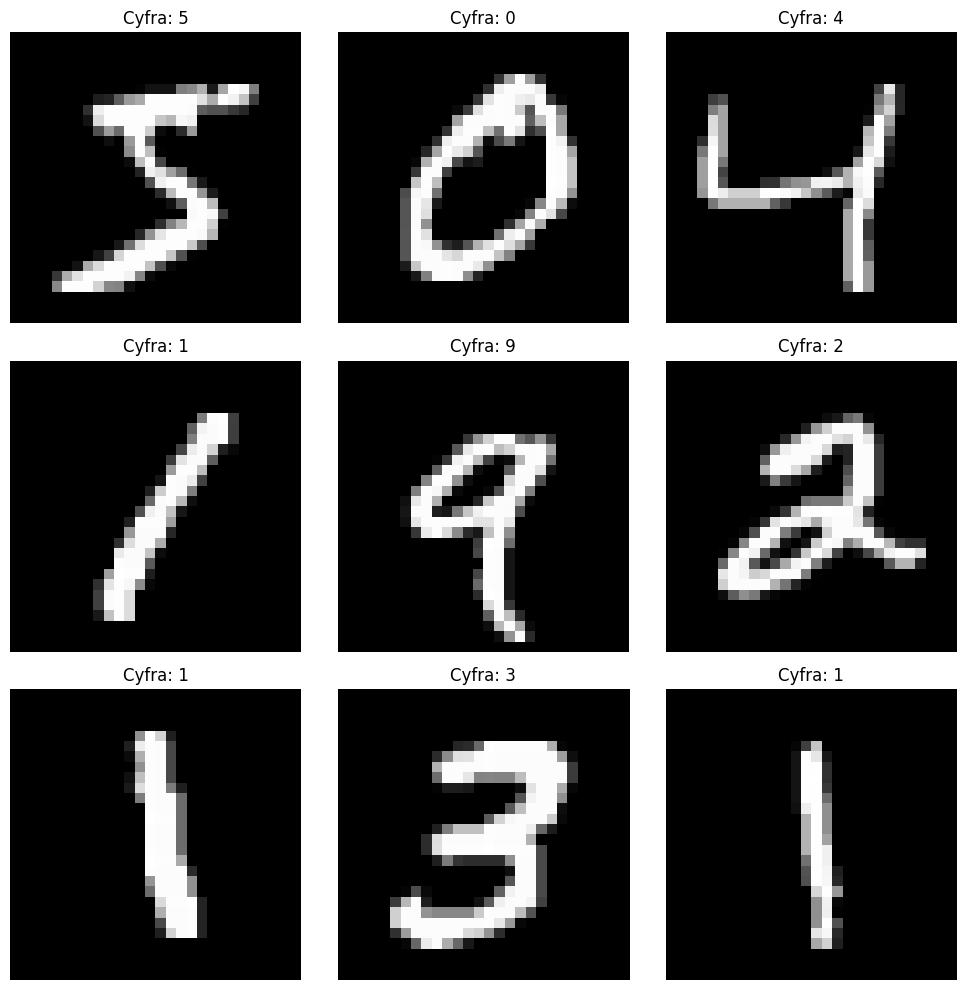

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(train_images[i], cmap='gray')
    plt.title(f"Cyfra: {train_labels[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

**Przepływ pracy DNN**
1. Tworzenie architektury sieci neuronowej.
2. Trenuj naszą sieć neuronową za pomocą danych treningowych, train_images i train_labels. Następnie sieć nauczy się kojarzyć obrazy i etykiety.
3. Sieć wygeneruje prognozy dla test_images i sprawdzimy, czy te prognozy są zgodne z etykietami z test_labels.

**Architektura DNN**
1. Nasza sieć będzie składać się z sekwencji dwóch warstw `Dense`, które są gęsto połączonymi (zwanymi również "w pełni połączonymi") warstwami neuronowymi.
2. Druga (i ostatnia) warstwa to 10-kierunkowa warstwa "softmax", co oznacza, że zwróci ona tablicę 10 wyników prawdopodobieństwa (sumujących się do 1). Każdy wynik będzie prawdopodobieństwem, że bieżący obraz cyfry należy do jednej z naszych 10 klas cyfr.

Trening DNN
Aby nasza sieć była gotowa do treningu, musimy wybrać jeszcze trzy elementy w ramach etapu "kompilacji":
1. **Funkcja straty**: Jest to sposób, w jaki sieć będzie w stanie zmierzyć, jak dobrze radzi sobie z danymi treningowymi, a tym samym, w jaki sposób będzie w stanie iść we właściwym kierunku.
2. **Optymalizator**: jest to mechanizm, za pomocą którego sieć będzie się aktualizować w oparciu o dane, które widzi i funkcję strat.
3. **Metryki**: do monitorowania podczas szkolenia i testowania. Tutaj będziemy dbać tylko o `dokładność` (ułamek obrazów, które zostały poprawnie sklasyfikowane).

Dzisiaj, podczas naszych 3 przykładów, będziemy używać tylko klasy Sequential. Podczas naszych następnych spotkań przedstawię funkcjonalne API, w którym będziemy mogli manipulować tensorami danych przetwarzanymi przez model i stosować warstwy do tych tensorów tak, jakby były funkcjami.


**Architektura sieci**

In [ ]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**Trening sieci**

Po zdefiniowaniu architektury modelu proces uczenia można skonfigurować na etapie kompilacji. Określamy: optymalizator, funkcję straty i metryki.

In [ ]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

**Przygotowanie danych**

Przed treningiem wstępnie przetworzymy nasze dane, przekształcając je w kształt oczekiwany przez sieć i skalując tak, aby wszystkie wartości mieściły się w przedziale [0, 1].

Nasze obrazy treningowe są przechowywane w tablicy o kształcie (60000, 28, 28) typu uint8 z wartościami w przedziale [0, 255].

Przekształć je w tablicę float32 typu shape (60000, 28 * 28) z wartościami od 0 do 1.
Niezbędne funkcje: `reshape` i `astype`.

**Wykonaj to zarówno dla przykładów treningowych, jak i testowych.**

In [ ]:
# TODO
# from tensorflow import reshape
import tensorflow as tf

train_images = train_images.reshape((60000, 28 * 28)).astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28)).astype('float32') / 255

print("Nowy kształt danych treningowych:", train_images.shape)
print("Nowy kształt danych testowych:", test_images.shape)
print("Zakres wartości pikseli:", np.min(train_images), "-", np.max(train_images))


Nowy kształt danych treningowych: (60000, 784)
Nowy kształt danych testowych: (10000, 784)
Zakres wartości pikseli: 0.0 - 1.0


Ponieważ używamy funkcji straty `categorical_crossentropy`, musimy przekonwertować format danych:

In [ ]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

print("Nowy kształt etykiet treningowych:", train_labels.shape)
print("Przykład zakodowanej etykiety:", train_labels[0])

Nowy kształt etykiet treningowych: (60000, 10)
Przykład zakodowanej etykiety: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


**Dopasowanie modelu**

Aby wytrenować naszą sieć, wywołujemy metodę dopasowania sieci z parametrami epochs i batch_size. Ustawmy epochs na 5, a batch_size na 128.

In [ ]:
#TODO: dopasowywanie modelu

history = network.fit(
    train_images,
    train_labels,
    epochs=5,
    batch_size=128,
    validation_data=(test_images, test_labels)
)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.8752 - loss: 0.4354 - val_accuracy: 0.9591 - val_loss: 0.1363
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9647 - loss: 0.1184 - val_accuracy: 0.9694 - val_loss: 0.0983
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.9774 - loss: 0.0731 - val_accuracy: 0.9725 - val_loss: 0.0873
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.9845 - loss: 0.0524 - val_accuracy: 0.9775 - val_loss: 0.0728
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.9895 - loss: 0.0365 - val_accuracy: 0.9808 - val_loss: 0.0641


**Ocena sieci/Ewaluacja**

Podczas treningu wyświetlane są dwie wielkości: "strata" sieci na danych szkoleniowych oraz dokładność sieci na danych szkoleniowych.
Szybko osiągamy dokładność 0,989 (tj. 98,9%) na danych treningowych.

Teraz sprawdźmy, czy nasz model działa dobrze również na zestawie testowym:

In [ ]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

print('test_acc:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9782 - loss: 0.0764
test_acc: 0.9807999730110168


Dokładność naszego zestawu testowego okazuje się wynosić 97,8% - to znacznie mniej niż dokładność zestawu treningowego.
Ta różnica między dokładnością treningu a dokładnością testu jest przykładem "**nadmiernego dopasowania**", czyli faktu, że modele uczenia maszynowego mają tendencję do osiągania gorszych wyników na nowych danych niż na danych treningowych.
